## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.274680  1.075485  0.470789  0.558033 -1.270613  0.616263
1  1.178976  1.579100 -0.815715 -0.328665 -0.820083 -0.639685
2  0.454051  0.573066  0.731057 -0.724492 -1.051852 -0.027896
3  0.084418 -0.032509  1.570988  0.861958  0.776028  1.741248
4 -1.113528  0.988220 -0.348996  1.084716  0.286047  0.318409


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0049659	total: 65.2ms	remaining: 1m 5s
1:	learn: 0.9960504	total: 65.7ms	remaining: 32.8s
2:	learn: 0.9855969	total: 66.2ms	remaining: 22s
3:	learn: 0.9754864	total: 66.6ms	remaining: 16.6s
4:	learn: 0.9672685	total: 67ms	remaining: 13.3s
5:	learn: 0.9560325	total: 67.3ms	remaining: 11.2s
6:	learn: 0.9463476	total: 67.6ms	remaining: 9.59s
7:	learn: 0.9373818	total: 68ms	remaining: 8.43s
8:	learn: 0.9266606	total: 68.3ms	remaining: 7.53s
9:	learn: 0.9175263	total: 68.8ms	remaining: 6.81s
10:	learn: 0.9101615	total: 69.2ms	remaining: 6.22s
11:	learn: 0.8991024	total: 69.5ms	remaining: 5.72s
12:	learn: 0.8889607	total: 69.9ms	remaining: 5.3s
13:	learn: 0.8803089	total: 70.2ms	remaining: 4.95s
14:	learn: 0.8730512	total: 70.6ms	remaining: 4.63s
15:	learn: 0.8657068	total: 71ms	remaining: 4.36s
16:	learn: 0.8572148	total: 71.3ms	remaining: 4.12s
17:	learn: 0.8492455	total: 71.7ms	remaining: 3.91s
18:	learn: 0.8404876	total: 72ms	remaining: 3.72s
19:

55:	learn: 0.5976587	total: 86.2ms	remaining: 1.45s
56:	learn: 0.5937450	total: 86.7ms	remaining: 1.43s
57:	learn: 0.5883423	total: 87.2ms	remaining: 1.42s
58:	learn: 0.5838062	total: 87.6ms	remaining: 1.4s
59:	learn: 0.5799039	total: 88ms	remaining: 1.38s
60:	learn: 0.5754206	total: 88.3ms	remaining: 1.36s
61:	learn: 0.5703457	total: 88.7ms	remaining: 1.34s
62:	learn: 0.5651300	total: 89ms	remaining: 1.32s
63:	learn: 0.5600566	total: 89.4ms	remaining: 1.31s
64:	learn: 0.5565481	total: 89.8ms	remaining: 1.29s
65:	learn: 0.5512498	total: 90.2ms	remaining: 1.28s
66:	learn: 0.5472337	total: 90.7ms	remaining: 1.26s
67:	learn: 0.5435219	total: 91.2ms	remaining: 1.25s
68:	learn: 0.5390103	total: 91.5ms	remaining: 1.24s
69:	learn: 0.5342612	total: 92.1ms	remaining: 1.22s
70:	learn: 0.5298249	total: 92.5ms	remaining: 1.21s
71:	learn: 0.5243833	total: 93ms	remaining: 1.2s
72:	learn: 0.5204226	total: 93.4ms	remaining: 1.19s
73:	learn: 0.5161330	total: 93.9ms	remaining: 1.18s
74:	learn: 0.5118273

260:	learn: 0.1414180	total: 183ms	remaining: 517ms
261:	learn: 0.1404514	total: 183ms	remaining: 516ms
262:	learn: 0.1393691	total: 184ms	remaining: 515ms
263:	learn: 0.1385461	total: 184ms	remaining: 513ms
264:	learn: 0.1376152	total: 185ms	remaining: 512ms
265:	learn: 0.1368451	total: 185ms	remaining: 511ms
266:	learn: 0.1361324	total: 186ms	remaining: 509ms
267:	learn: 0.1352972	total: 186ms	remaining: 508ms
268:	learn: 0.1341619	total: 187ms	remaining: 507ms
269:	learn: 0.1333957	total: 187ms	remaining: 506ms
270:	learn: 0.1325498	total: 188ms	remaining: 504ms
271:	learn: 0.1316456	total: 188ms	remaining: 503ms
272:	learn: 0.1308647	total: 188ms	remaining: 502ms
273:	learn: 0.1301905	total: 189ms	remaining: 500ms
274:	learn: 0.1292280	total: 189ms	remaining: 499ms
275:	learn: 0.1284370	total: 190ms	remaining: 498ms
276:	learn: 0.1277272	total: 190ms	remaining: 496ms
277:	learn: 0.1267424	total: 191ms	remaining: 495ms
278:	learn: 0.1259556	total: 191ms	remaining: 494ms
279:	learn: 

446:	learn: 0.0540399	total: 269ms	remaining: 333ms
447:	learn: 0.0537169	total: 269ms	remaining: 332ms
448:	learn: 0.0533793	total: 270ms	remaining: 331ms
449:	learn: 0.0531053	total: 270ms	remaining: 330ms
450:	learn: 0.0528034	total: 271ms	remaining: 330ms
451:	learn: 0.0525093	total: 271ms	remaining: 329ms
452:	learn: 0.0522227	total: 272ms	remaining: 328ms
453:	learn: 0.0519143	total: 272ms	remaining: 328ms
454:	learn: 0.0515904	total: 273ms	remaining: 327ms
455:	learn: 0.0512254	total: 273ms	remaining: 326ms
456:	learn: 0.0509270	total: 274ms	remaining: 325ms
457:	learn: 0.0506218	total: 274ms	remaining: 324ms
458:	learn: 0.0503301	total: 275ms	remaining: 324ms
459:	learn: 0.0501667	total: 275ms	remaining: 323ms
460:	learn: 0.0499861	total: 276ms	remaining: 322ms
461:	learn: 0.0496931	total: 276ms	remaining: 322ms
462:	learn: 0.0494100	total: 277ms	remaining: 322ms
463:	learn: 0.0491124	total: 278ms	remaining: 321ms
464:	learn: 0.0488353	total: 278ms	remaining: 320ms
465:	learn: 

648:	learn: 0.0250099	total: 365ms	remaining: 197ms
649:	learn: 0.0249395	total: 365ms	remaining: 197ms
650:	learn: 0.0249116	total: 366ms	remaining: 196ms
651:	learn: 0.0248610	total: 366ms	remaining: 196ms
652:	learn: 0.0248061	total: 367ms	remaining: 195ms
653:	learn: 0.0247564	total: 367ms	remaining: 194ms
654:	learn: 0.0246117	total: 368ms	remaining: 194ms
655:	learn: 0.0245433	total: 368ms	remaining: 193ms
656:	learn: 0.0244942	total: 369ms	remaining: 192ms
657:	learn: 0.0243868	total: 369ms	remaining: 192ms
658:	learn: 0.0242822	total: 370ms	remaining: 191ms
659:	learn: 0.0241901	total: 370ms	remaining: 191ms
660:	learn: 0.0240882	total: 371ms	remaining: 190ms
661:	learn: 0.0239984	total: 371ms	remaining: 189ms
662:	learn: 0.0239107	total: 372ms	remaining: 189ms
663:	learn: 0.0238450	total: 372ms	remaining: 188ms
664:	learn: 0.0238013	total: 372ms	remaining: 188ms
665:	learn: 0.0237500	total: 373ms	remaining: 187ms
666:	learn: 0.0237075	total: 373ms	remaining: 186ms
667:	learn: 

837:	learn: 0.0139054	total: 451ms	remaining: 87.2ms
838:	learn: 0.0138788	total: 452ms	remaining: 86.7ms
839:	learn: 0.0138504	total: 452ms	remaining: 86.1ms
840:	learn: 0.0138243	total: 453ms	remaining: 85.6ms
841:	learn: 0.0137744	total: 453ms	remaining: 85ms
842:	learn: 0.0137488	total: 453ms	remaining: 84.4ms
843:	learn: 0.0136929	total: 454ms	remaining: 83.9ms
844:	learn: 0.0136372	total: 454ms	remaining: 83.3ms
845:	learn: 0.0135830	total: 455ms	remaining: 82.8ms
846:	learn: 0.0135633	total: 455ms	remaining: 82.2ms
847:	learn: 0.0134871	total: 455ms	remaining: 81.6ms
848:	learn: 0.0134677	total: 456ms	remaining: 81.1ms
849:	learn: 0.0134487	total: 456ms	remaining: 80.5ms
850:	learn: 0.0133945	total: 457ms	remaining: 80ms
851:	learn: 0.0133206	total: 457ms	remaining: 79.4ms
852:	learn: 0.0132961	total: 457ms	remaining: 78.8ms
853:	learn: 0.0132757	total: 458ms	remaining: 78.3ms
854:	learn: 0.0132102	total: 458ms	remaining: 77.7ms
855:	learn: 0.0131921	total: 458ms	remaining: 77.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

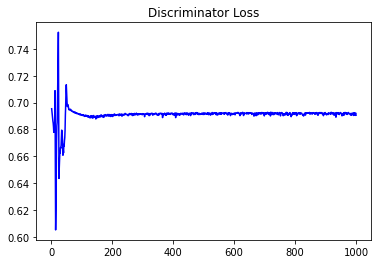

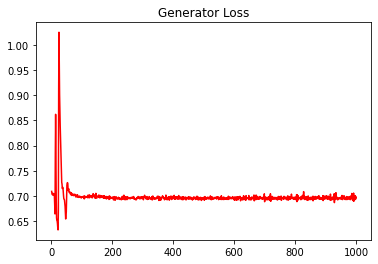

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08198941256369133


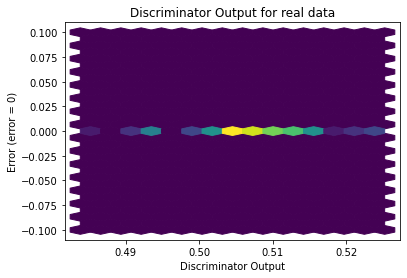

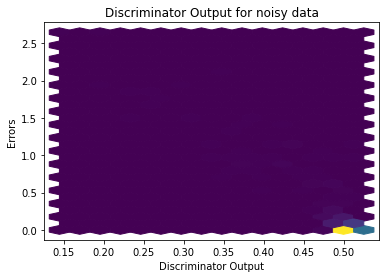

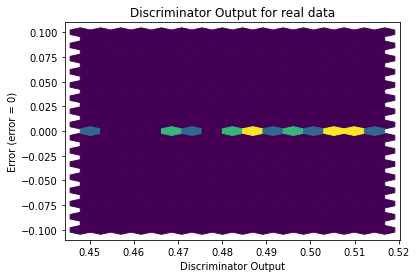

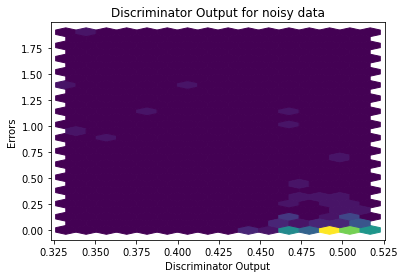

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


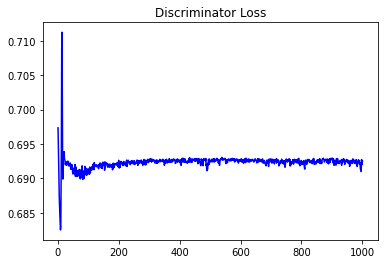

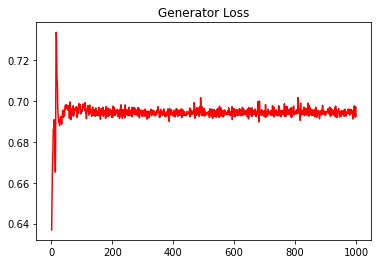

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06151127505595063


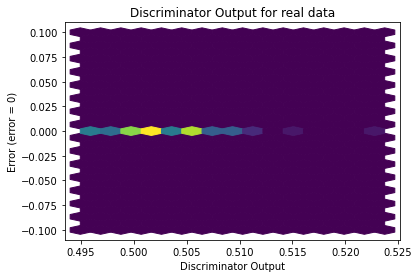

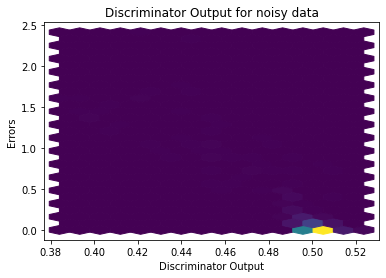

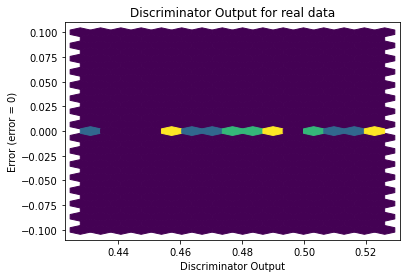

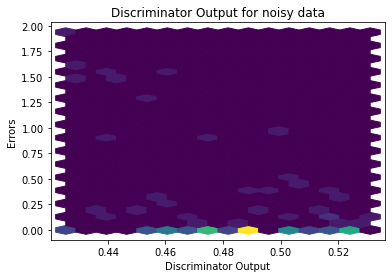

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9553]], requires_grad=True)
